<a href="https://colab.research.google.com/github/Hectorjr74/Assignment-2/blob/main/road_accident_model_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
import pandas as pd
import statsmodels.api as sm

with open('accident_model.pkl', 'rb') as f:
    model = pickle.load(f)

hypothetical = pd.DataFrame({'const': 1, 'speed': 80, 'alcohol': 1, 'road_condition': 1,
                             'time_night': 1, 'helmet': 0, 'weather_bad': 1}, index=[0])
pred = model.predict(hypothetical)[0]
print(f"Predicted severity: {pred}")

Predicted severity: 10.325282144629782


       speed  alcohol  road_condition  time_night  helmet  weather_bad  \
0  69.934283        0               0           0       1            0   
1  57.234714        0               0           0       1            0   
2  72.953771        0               0           0       1            0   
3  90.460597        0               0           1       1            0   
4  55.316933        0               1           0       1            1   

   severity  
0  1.841026  
1  1.626024  
2  1.708225  
3  5.842275  
4  4.771391  
             speed      alcohol  road_condition  time_night      helmet  \
count  1000.000000  1000.000000     1000.000000  1000.00000  1000.00000   
mean     60.474152     0.147000        0.400000     0.27700     0.61800   
std      19.262852     0.354283        0.490143     0.44774     0.48612   
min      20.000000     0.000000        0.000000     0.00000     0.00000   
25%      47.048194     0.000000        0.000000     0.00000     0.00000   
50%      60.506012   

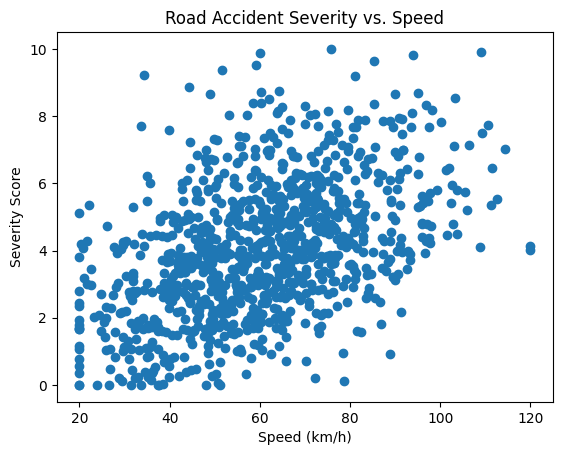

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle

# Generate synthetic dataset (as described)
np.random.seed(42)
n_samples = 1000
speed = np.random.normal(60, 20, n_samples).clip(20, 120)
alcohol = np.random.binomial(1, 0.15, n_samples)
road_condition = np.random.binomial(1, 0.4, n_samples)
time_night = np.random.binomial(1, 0.3, n_samples)
helmet = np.random.binomial(1, 0.6, n_samples)
weather_bad = np.random.binomial(1, 0.25, n_samples)
noise = np.random.normal(0, 1, n_samples)
severity = (0.05 * speed + 2 * alcohol + 1.5 * road_condition + 1.2 * time_night - 1 * helmet + 1.8 * weather_bad + noise).clip(0, 10)

data = pd.DataFrame({
    'speed': speed, 'alcohol': alcohol, 'road_condition': road_condition,
    'time_night': time_night, 'helmet': helmet, 'weather_bad': weather_bad,
    'severity': severity
})

# View data
print(data.head())
print(data.describe())

# Fit model
X = sm.add_constant(data[['speed', 'alcohol', 'road_condition', 'time_night', 'helmet', 'weather_bad']])
y = data['severity']
model = sm.OLS(y, X).fit()
print(model.summary())

# Save model
with open('accident_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print('Model saved!')

# Example prediction
hypothetical = pd.DataFrame({'const': 1, 'speed': 80, 'alcohol': 1, 'road_condition': 1,
                             'time_night': 1, 'helmet': 0, 'weather_bad': 1}, index=[0])
pred = model.predict(hypothetical)[0]
print(f'Predicted severity: {pred}')

# Plot
plt.scatter(data['speed'], data['severity'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Severity Score')
plt.title('Road Accident Severity vs. Speed')
plt.savefig('severity_vs_speed.png')
plt.show()  # In notebook, this displays the plot